# Import relevent libraries 

**Problem Statement**:
Classify the water quality whether it is potable or not based on the features provided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

# Initial Analysis

In [2]:
df = pd.read_csv('/content/water_potability.csv')

There are 9 Independent features and 1 dependent features. Details for each features are provided in the above top. objective is to use the Potability feature as target feature for classification problem. Let is do more analysis to learn about the dataset better.

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Problem Statement**:

Classify the water quality whether it is potable or not based on the features provided.

**Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Data Preprocessing

Check for Null Values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB



*  To get Statistical summary of the data
*  To get the measures of central tendancy, measures of dispersion.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
# Portability is 1 - means good for Human
df[df['Potability'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1101.0,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.0,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.0,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.0,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.0,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.0,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.0,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.0,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.0,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Portability is 0 - means not good for Human
df[df['Potability'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1684.0,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.0,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.0,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.0,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.0,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.0,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.0,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.0,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.0,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Check for duplicates, drop if any.

In [8]:
df.drop_duplicates(inplace=True)

Check for null and NaN values.

In [9]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Fill the NA values with the mean of the respective columns as the variables are numerical continuous.

In [10]:
df.fillna(df.mean(), inplace=True)

Null values removed.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [12]:
columns = [col for col in df.columns[:-1]]

# Data Visualization

Box plot is used 
*   To understand the Inter Quartile Range,median of the data.
*   To identify the outliers.

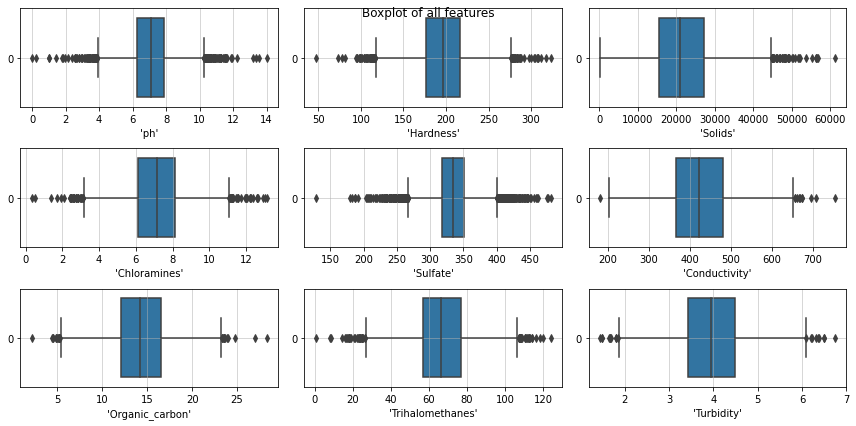

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(12, 6))
ax = ax.flatten()
plt.suptitle("Boxplot of all features")

for col, index in zip(columns, range(len(columns))):
    sns.boxplot(ax=ax[columns.index(col)], data=df[col], orient='h')
    ax[columns.index(col)].grid(linewidth=0.5)
    ax[columns.index(col)].set_xlabel(f"'{col}'")
    ax[columns.index(col)].set_ylabel(None)

plt.tight_layout()

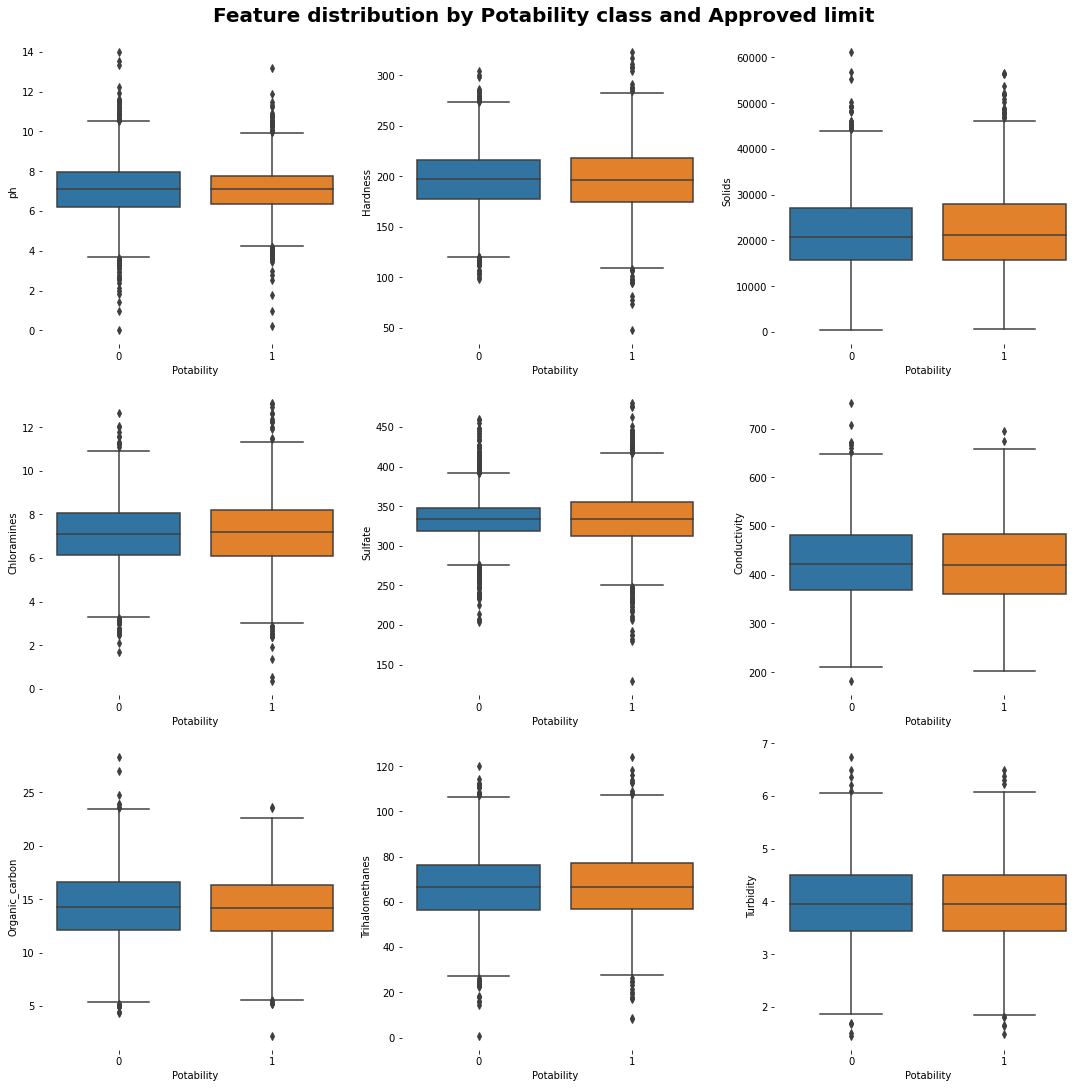

In [14]:
fig, ax = plt.subplots(nrows=3,
                       ncols=3,
                       figsize=(15, 15),
                       constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit',
             size=20,
             weight='bold')
ax = ax.flatten()
for x, i in enumerate(columns):
    sns.boxplot(data=df, y=i, x=df.columns[9], ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left', 'right', 'top', 'bottom']:
        ax[x].spines[s].set_visible(False)

We can infer from the boxplot that there are outliers in the dataset, we need to handle the same. 

Most feature means are looks similar and there are very less differnce in variance.



Use RobustScaler to remove outliers in the data.

In [15]:
rb = RobustScaler(unit_variance=True)
df1 = rb.fit_transform(df)

In [16]:
df = pd.DataFrame(data=df1, columns=df.columns)

Use Min Max scaler to scale and translate each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [17]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
df2 = mn.fit_transform(df)

In [18]:
df = pd.DataFrame(data=df2, columns=df.columns)

In [19]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,0.505771,0.104997,0.0,0.448405,0.505771,0.562146,1.0
Hardness,3276.0,0.540231,0.119263,0.0,0.469432,0.542401,0.613857,1.0
Solids,3276.0,0.356173,0.143968,0.0,0.251957,0.338338,0.443498,1.0
Chloramines,3276.0,0.529963,0.123921,0.0,0.452088,0.530591,0.607662,1.0
Sulfate,3276.0,0.581699,0.102669,0.0,0.534313,0.581699,0.628882,1.0
Conductivity,3276.0,0.427940,0.141336,0.0,0.322196,0.420386,0.525145,1.0
Organic_carbon,3276.0,0.463026,0.126750,0.0,0.378000,0.460473,0.550102,1.0
Trihalomethanes,3276.0,0.532673,0.127938,0.0,0.453584,0.532673,0.615994,1.0
Turbidity,3276.0,0.475853,0.147548,0.0,0.376198,0.473630,0.576729,1.0
Potability,3276.0,0.390110,0.487849,0.0,0.000000,0.000000,1.000000,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


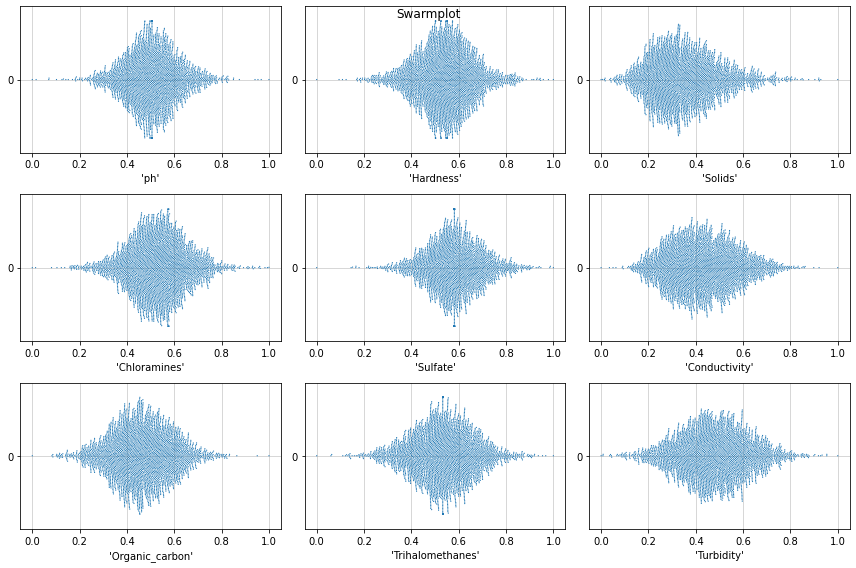

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
ax = ax.flatten()
plt.suptitle("Swarmplot")

for col, index in zip(columns, range(len(columns))):
    sns.swarmplot(ax=ax[columns.index(col)],
                  data=df[col],
                  orient='h',
                  size=1.2)
    ax[columns.index(col)].grid(linewidth=0.5)
    ax[columns.index(col)].set_xlabel(f"'{col}'")

plt.tight_layout()

Histogram is used to identify the distribution of the data. 

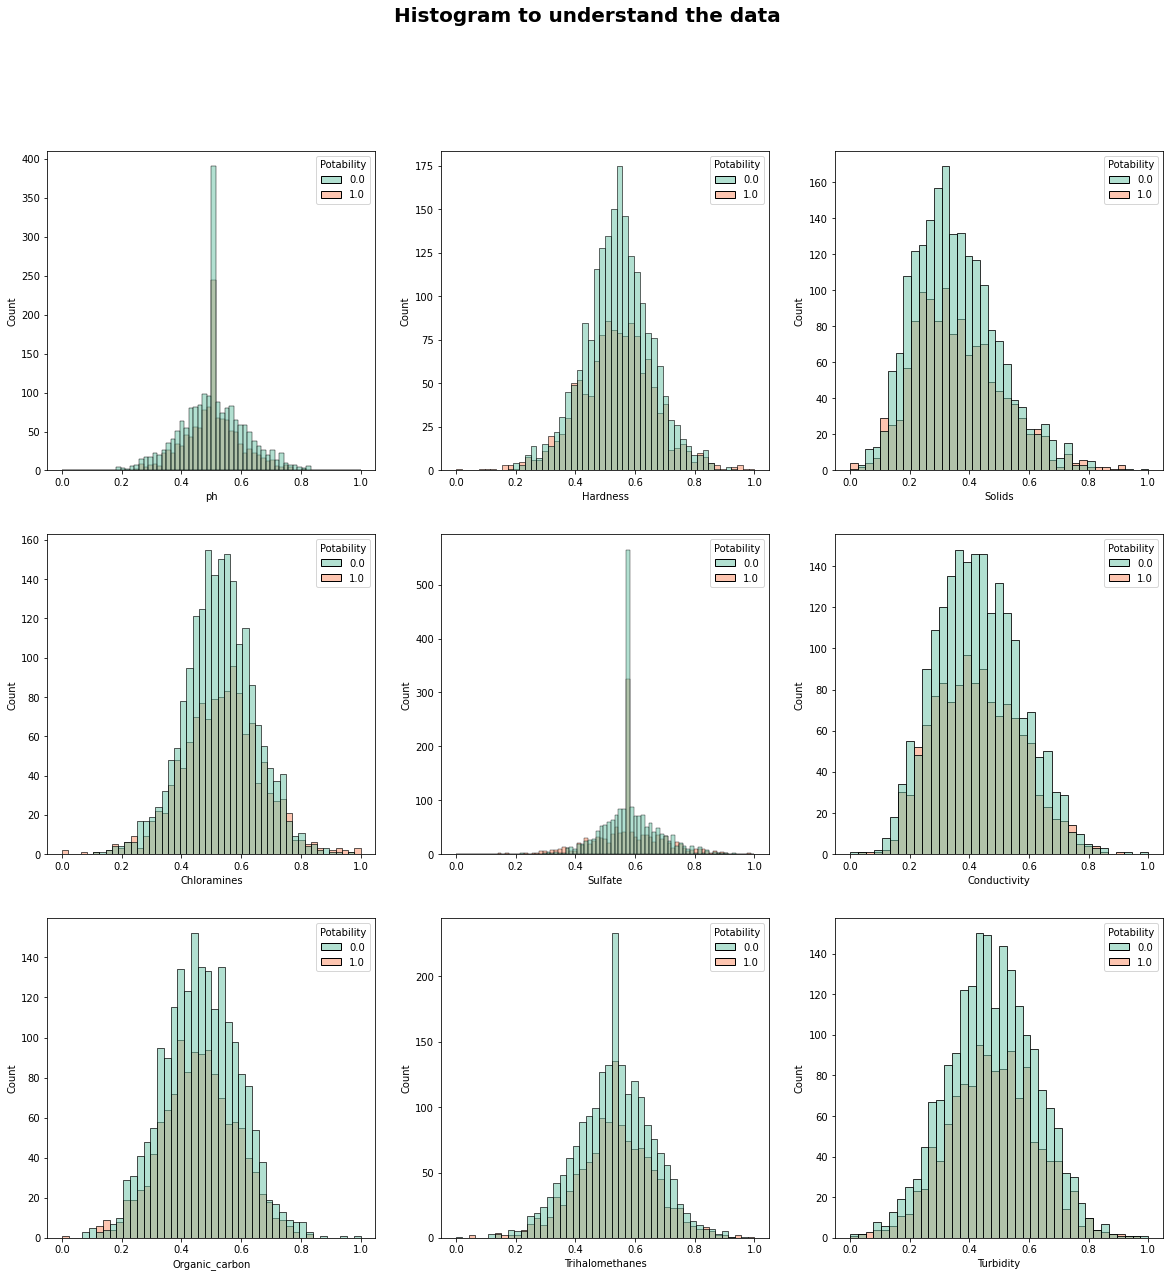

In [21]:
columns = [col for col in df.columns[:-1]]
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
plt.suptitle('Histogram to understand the data', size=20, weight='bold')
ax = ax.flatten()
for x, i in enumerate(columns):
    sns.histplot(data=df, x=i, hue=df.columns[9], ax=ax[x], palette='Set2')
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left', 'right', 'top', 'bottom']:
        ax[x].spines[s].set_visible(True)

Pairplot is used to identify the relation between the variables.

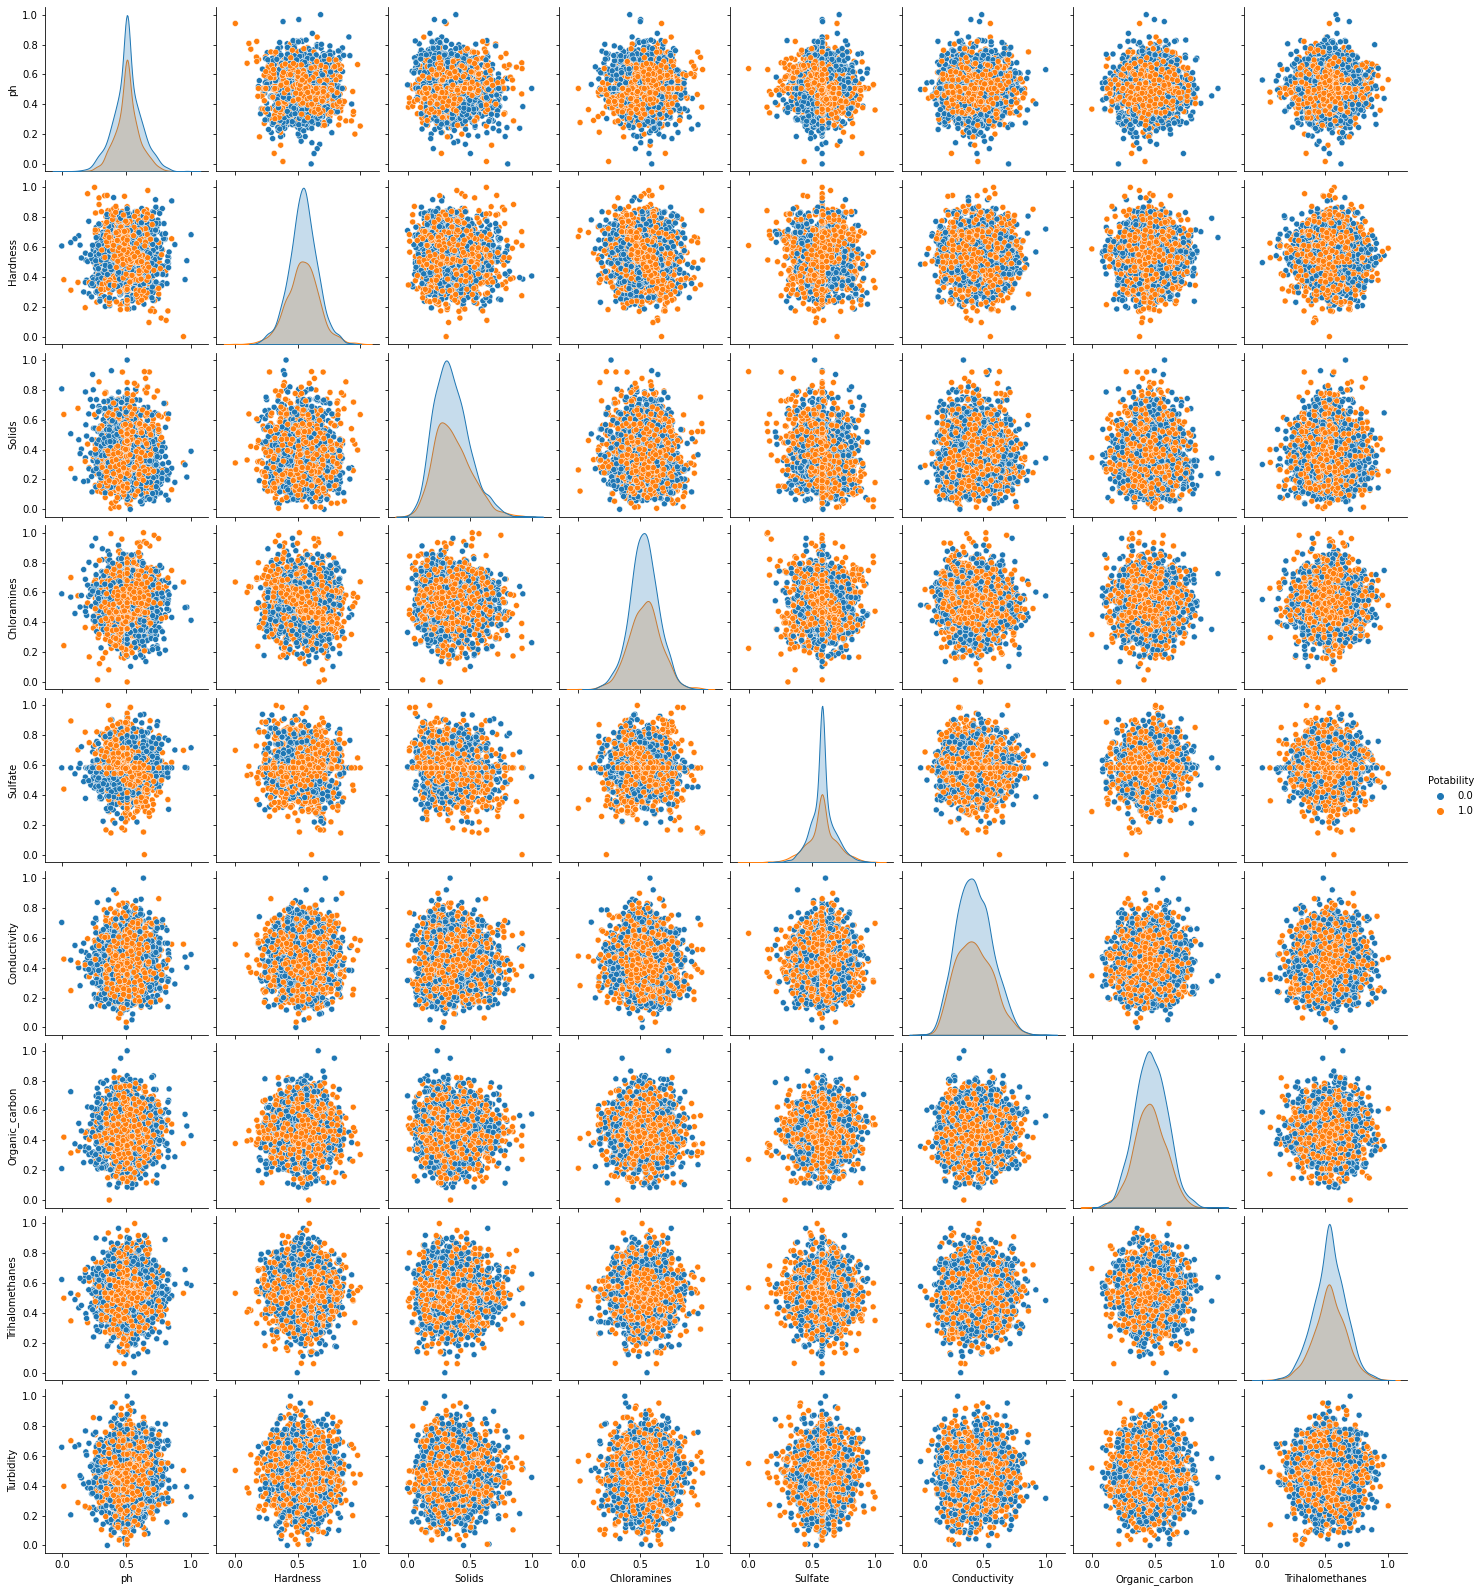

In [23]:
sns.pairplot(data=df, x_vars=df.columns[0:8], hue=df.columns[9])

Pairplot is used to find the correlation between two variables. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

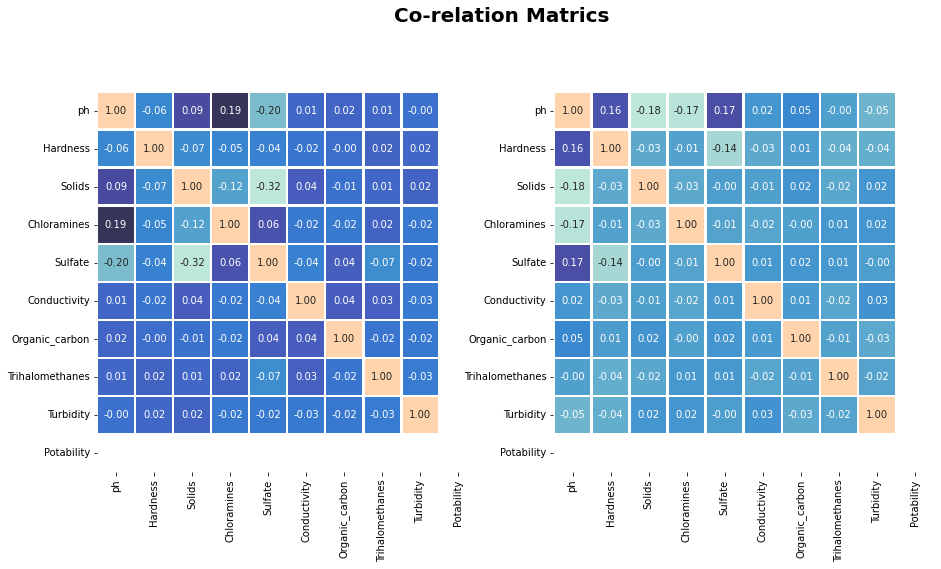

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
sns.heatmap(df[df['Potability'] == 1].corr(),
            annot=True,
            square=True,
            fmt='.2f',
            ax=ax[0],
            cbar=False,
            cmap='icefire',
            linewidths=1.5,
            linecolor='white')
plt.xticks(rotation=90)
sns.heatmap(df[df['Potability'] == 0].corr(),
            annot=True,
            square=True,
            fmt='.2f',
            ax=ax[1],
            cbar=False,
            cmap='icefire',
            linewidths=1.5,
            linecolor='white')
plt.xticks(rotation=90)

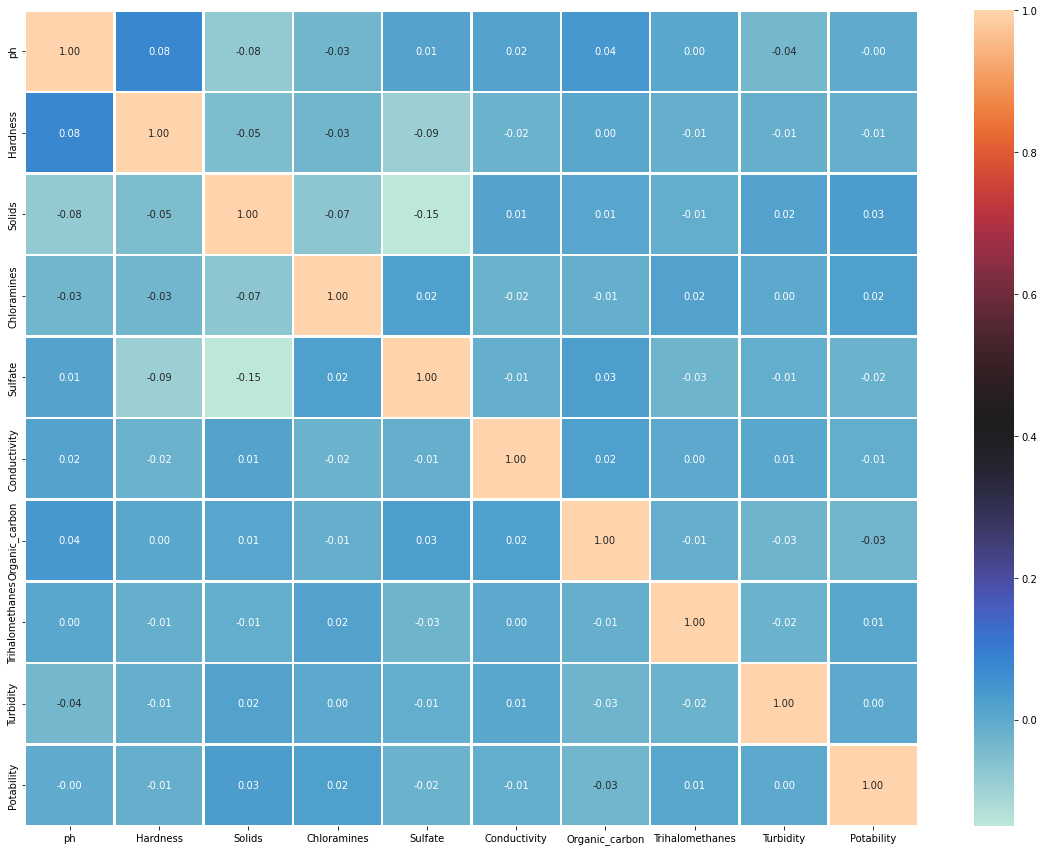

In [28]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),
            annot=True,
            cmap='icefire',
            linewidths=1.5,
            linecolor='white',
            fmt='.2f')

Both Co-relation matrix & Paiplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models.

Balancing the data by Random upsampling.

Text(0, 0.5, 'Count')

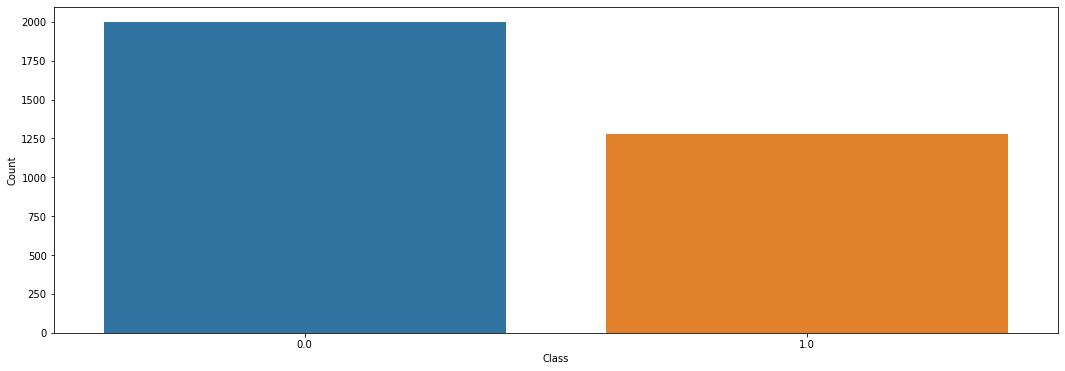

In [29]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(data=df, x=df.columns[9])
plt.xlabel("Class")
plt.ylabel("Count")

In [30]:
print(df['Potability'].value_counts())

0.0    1998
1.0    1278
Name: Potability, dtype: int64


Text(0.5, 1.0, 'Pie chart')

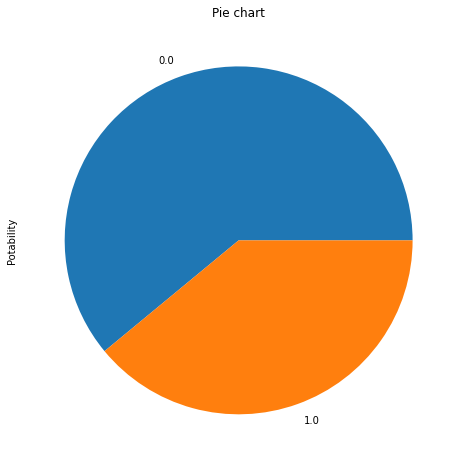

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
df['Potability'].value_counts().plot(kind='pie')
plt.title("Pie chart")

Thus it is an imbalanced dataset, since zero is much more one (1671>995) So we need to balance the data so that there is no biasedness

I have used random upsampling technique

In [32]:
from sklearn.utils import shuffle
from sklearn.utils import resample

zero = df[df['Potability'] == 0]  # zero values in Potability column
one = df[df['Potability'] == 1]  # one values in Potability column
# minority class that  is 1, we need to upsample/increase that class so that there is no bias
# n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace=True, n_samples=1998)
# concatenate
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df)  # shuffling so that there is particular sequence

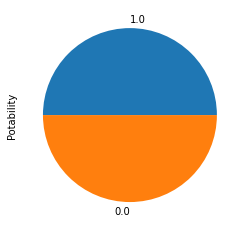

In [33]:
df.Potability.value_counts().plot(kind='pie')

In [34]:
print(df['Potability'].value_counts())

1.0    1998
0.0    1998
Name: Potability, dtype: int64


In [35]:
df.corr().abs()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.037484
Organic_carbon     0.031137
Sulfate            0.028341
Trihalomethanes    0.013491
Hardness           0.010628
Chloramines        0.010543
Turbidity          0.008245
Conductivity       0.007257
ph                 0.003758
Name: Potability, dtype: float64

# Build the classification model.

In [36]:
X = df.drop(['Potability'], axis=1)
y = df['Potability']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)

Use standard scaler 

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 Hyperparameter tuning 

In [39]:
lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

para_knn = {'n_neighbors': np.arange(1, 50)}  # parameters of knn
# search knn for 5 fold cross validation
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)

# parameters for decision tree
para_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 50),
    'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80, 100]
}
# grid search decision tree for 5 fold cv
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)
# "gini" for the Gini impurity and “entropy” for the information gain.
# min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

# parameters for random forest
# n_estimators: The number of trees in the forest.
params_rf = {
    'n_estimators': [100, 200, 350, 500],
    'min_samples_leaf': [2, 10, 30]
}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

# parameters fpr AdaBoost
params_ada = {
    'n_estimators': [50, 100, 250, 400, 500, 600],
    'learning_rate': [0.2, 0.5, 0.8, 1]
}
grid_ada = GridSearchCV(ada, param_grid=params_ada, cv=5)

# XGBoost
# parameters for xgboost
params_xgb = {
    'n_estimators': [50, 100, 250, 400, 600, 800, 1000],
    'learning_rate': [0.2, 0.5, 0.8, 1]
}
rs_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [40]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 44, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 100}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 800, 'learning_rate': 0.8}


Use GridsearchCV to find the optimal parameters for the classification algorithms


1.   Logistic Regression
2.   K-Nearest Neighbour
3.   Decision Tree
4. Random Forest
5. Adaboost Classifier
6. XGB Classifier

Apply Bagging and Boosting

Fit the models and get the best parameters.

In [41]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=44,
                            min_samples_leaf=1,
                            random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
rf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=2,
                            random_state=42)
ada = AdaBoostClassifier(n_estimators=600, learning_rate=1)
xgb = XGBClassifier(n_estimators=800, learning_rate=0.8)

# let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=44,
                                                   min_samples_leaf=1,
                                                   random_state=42),
                            n_estimators=100,
                            random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=44,
                                                        random_state=42),
                  n_estimators=100, random_state=42)

In [42]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('Bagging Classifier', bagging), ('XGBoost', xgb)]

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for classifier_name, classifier in classifiers:

    # Fit clf to the training set
    classifier.fit(X_train, y_train)

    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    print(classification_report(y_test, y_pred))

Logistic Regression : 0.50
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49       400
         1.0       0.50      0.52      0.51       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

K Nearest Neighbours : 0.71
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74       400
         1.0       0.77      0.60      0.67       400

    accuracy                           0.71       800
   macro avg       0.72      0.71      0.71       800
weighted avg       0.72      0.71      0.71       800

Decision Tree : 0.77
              precision    recall  f1-score   support

         0.0       0.83      0.69      0.75       400
         1.0       0.73      0.85      0.79       400

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       80

Use the bagging classifier as it performs well.

In [51]:
from sklearn.metrics import classification_report

y_pred_bg = bagging.predict(X_test)
print(classification_report(y_test, y_pred_bg))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       400
         1.0       0.82      0.84      0.83       400

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



Use various metrics to evaluate the model.

In [52]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_bg)

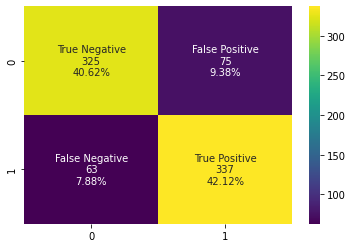

In [53]:
group_names = [
    'True Negative', 'False Positive', 'False Negative', 'True Positive'
]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = [
    '{0:.2%}'.format(value)
    for value in cf_matrix.flatten() / np.sum(cf_matrix)
]
labels = [
    f'{v1}\n{v2}\n{v3}'
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='viridis')

In [54]:
from sklearn.metrics import roc_auc_score

auc = np.round(roc_auc_score(y_test, y_pred_bg), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.828


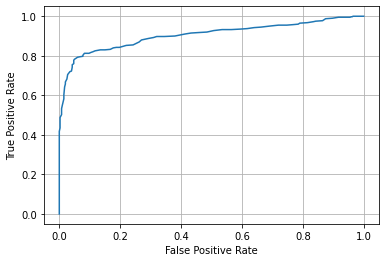

In [55]:
from sklearn.metrics import roc_curve

y_pred_proba = bagging.predict_proba(X_test)[::, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)

**Conclusion:** The water is classified as potable or not. The Bagging model gives highest accuracy(84%)